In [ ]:
import pandas as pd
import numpy as np

n_acry = 1.49

dict = {'angle_1':[32,90,13,21,82.5],
        'angle_1_error':[1.5,1.5,1,1,0.5],
        'angle_2':[19.5,37,10.5,15,39.5],
        'angle_2_error':[0.5,1,0.5,1,0.5]}

df = pd.DataFrame(dict)

df['sin_1'] = round(np.sin(np.radians(df['angle_1'])),2)
df['sin_2'] = round(np.sin(np.radians(df['angle_2'])),2)
df['n'] = round(df['angle_1']/df['angle_2'],2)
df['sq_error'] = round((df['n'] - n_acry)**2,2)
df['angle_1_relative_error'] = round(df['angle_1_error']/df['angle_1'],2)
df['angle_2_relative_error'] = round(df['angle_2_error']/df['angle_2'],2)
df['n_error'] = round(df['n']*(df['angle_1_relative_error'] + df['angle_2_relative_error']),2)

df['angle_1'] = df['angle_1'].apply(lambda x: f"{x:.2f}")
df['angle_1_error'] = df['angle_1_error'].apply(lambda x: f"{x:.2f}")
df['angle_2'] = df['angle_2'].apply(lambda x: f"{x:.2f}")
df['angle_2_error'] = df['angle_2_error'].apply(lambda x: f"{x:.2f}")

df

,angle_1,angle_1_error,angle_2,angle_2_error,sin_1,sin_2,n,sq_error,angle_1_relative_error,angle_2_relative_error,n_error
0,32.00,1.50,19.50,0.50,0.53,0.33,1.64,0.02,0.05,0.03,0.13
1,90.00,1.50,37.00,1.00,1.00,0.60,2.43,0.88,0.02,0.03,0.12
2,13.00,1.00,10.50,0.50,0.22,0.18,1.24,0.06,0.08,0.05,0.16
3,21.00,1.00,15.00,1.00,0.36,0.26,1.40,0.01,0.05,0.07,0.17
4,82.50,0.50,39.50,0.50,0.99,0.64,2.09,0.36,0.01,0.01,0.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   angle_1                 5 non-null      object 
 1   angle_1_error           5 non-null      object 
 2   angle_2                 5 non-null      object 
 3   angle_2_error           5 non-null      object 
 4   sin_1                   5 non-null      float64
 5   sin_2                   5 non-null      float64
 6   n                       5 non-null      float64
 7   sq_error                5 non-null      float64
 8   angle_1_relative_error  5 non-null      float64
 9   angle_2_relative_error  5 non-null      float64
 10  n_error                 5 non-null      float64
dtypes: float64(7), object(4)
memory usage: 568.0+ bytes


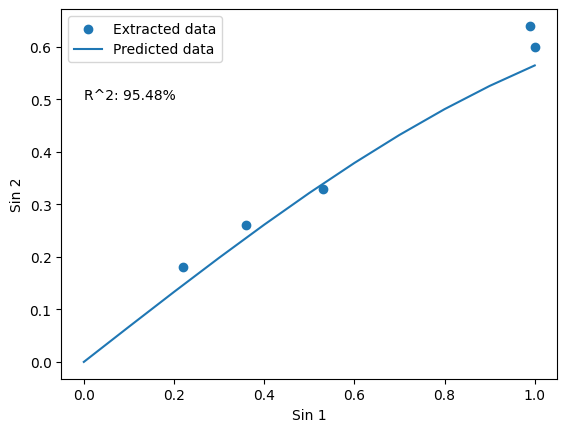

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def sin_2_pred(angle_1):
  return np.sin(angle_1)/n_acry

x = np.arange(0,1.01,0.1)
y = sin_2_pred(x)

y_pred = df['sin_1']/n_acry
r2 = r2_score(df['sin_2'],y_pred)

plt.scatter(df['sin_1'],df['sin_2'],label='Extracted data')
plt.plot(x,y,label='Predicted data')
plt.xlabel("Sin 1")
plt.ylabel("Sin 2")
plt.legend()
plt.text(0,0.5,f'R^2: {round(r2*100,2)}%')
plt.show()

In [ ]:
df['n_measure'] = pd.Series([f"{df['n'][x]} ± {df['n_error'][x]}" for x in range(len(df['n']))])

df[['angle_1','n_measure']]

,angle_1,n_measure
0,32.00,1.64 ± 0.13
1,90.00,2.43 ± 0.12
2,13.00,1.24 ± 0.16
3,21.00,1.4 ± 0.17
4,82.50,2.09 ± 0.04


In [ ]:
df['angle_1'] = df['angle_1'].astype('float64')
df['angle_2'] = df['angle_2'].astype('float64')
df['angle_1_error'] = df['angle_1_error'].astype('float64')
df['angle_2_error'] = df['angle_2_error'].astype('float64')

df['discrepancy'] = abs(df['angle_1'] - df['angle_2']) <= (df['angle_1_error'] + df['angle_2_error'])

df['discrepancy']

,discrepancy
0,False
1,False
2,False
3,False
4,False


In [ ]:
df['accuracy'] = (df['n'] - df['n_error'] < n_acry) & (df['n'] + df['n_error'] > n_acry)

df['accuracy']

,accuracy
0,False
1,False
2,False
3,True
4,False
